In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st

# Set path for crash data file
monroe_county_crash_path = "data/monroe-county-crash-data2003-to-2015.csv"

# Read the crash data 
df = pd.read_csv(monroe_county_crash_path, encoding="ISO-8859-1")

# Display the data table for preview
df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [3]:
# Here are all the column names if you need to copy/paste.
print(df.columns)

# Here are all the data types.
print(df.dtypes)

Index(['Master Record Number', 'Year', 'Month', 'Day', 'Weekend?', 'Hour',
       'Collision Type', 'Injury Type', 'Primary Factor', 'Reported_Location',
       'Latitude', 'Longitude'],
      dtype='object')
Master Record Number      int64
Year                      int64
Month                     int64
Day                       int64
Weekend?                 object
Hour                    float64
Collision Type           object
Injury Type              object
Primary Factor           object
Reported_Location        object
Latitude                float64
Longitude               float64
dtype: object


# Data Cleaning

#### Please take detailed notes of any issues that occur during your exploration, and we can clean the data up collectively when we gather next.  

In [5]:
# Data cleaning work will be placed in this cell. Please hold on this aspect. 
# counting the values 
df.isnull().sum()

Master Record Number       0
Year                       0
Month                      0
Day                        0
Weekend?                  68
Hour                     225
Collision Type             6
Injury Type                0
Primary Factor          1121
Reported_Location         35
Latitude                  30
Longitude                 30
dtype: int64

In [6]:
df["Collision Type"]. value_counts()

2-Car               37606
1-Car               10245
3+ Cars              3152
Moped/Motorcycle     1007
Bus                   850
Pedestrian            609
Cyclist               468
Name: Collision Type, dtype: int64

In [11]:
df1=df.dropna(axis=0,subset = ["Collision Type"]) 

In [12]:
df1.isnull().sum()

Master Record Number       0
Year                       0
Month                      0
Day                        0
Weekend?                  68
Hour                     225
Collision Type             0
Injury Type                0
Primary Factor          1119
Reported_Location         35
Latitude                  30
Longitude                 30
dtype: int64

In [26]:
injury_count=df1["Injury Type"].value_counts()
injury_count

No injury/unknown     41597
Non-incapacitating    11136
Incapacitating         1089
Fatal                   115
Name: Injury Type, dtype: int64

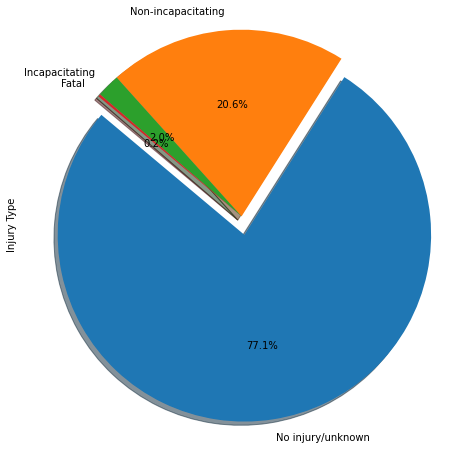

In [30]:
explode = (0.1, 0, 0, 0,)
injury_count.plot(kind="pie", explode= explode, autopct="%1.1f%%", shadow=True, startangle=140, figsize = (8,8))
plt.axis("equal");

In [ ]:
df2=df[["Collision Type"]]

TypeError: 'value' must be an instance of str or bytes, not a float

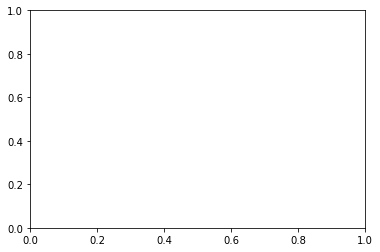

In [32]:
plt.bar(df["Collision Type"],df["Injury Type"])


# Preliminary Data Exploration 

### Question 1: When do more fatal accidents occur? -Tosha 
>- **Theory:** There are more fatal crashes on the weekend and at night.
- Pie chart: What percentage of fatal accidents occur on the weekends vs. weekdays? 
- Pie chart: Fatal accidents in the nighttime vs. daytime?  
- Data cleaning note: There are records missing the weekend/weekday field (will be empty). Keep these for now, we will remove later. 


### Question 2: Does a certain day of the week/time of day have a higher incidence of accidents? -Sam 
>- **Theory:** The day of the week and time of day can heighten the incidence of collisions. 
- Line chart: x-axis is year, y-axis is count of collisions, line color is day of the week
- Scattor plot: x-axis is hours, y-axis is the count of collisions (linregress may be possible) 
- Extra: Are there certain times of the year with a higher incidence of collisions? 
- Data cleaning note: TBD


### Question 3: What are the most frequent primary factors causing a collision? -Kylee 
>- **Theory:** TBD
- Bar chart: count of collisions based on primary factor (do a value_count first to see the top reasons and then do a groupby)
- Scatter plot: Primary factor (colors), x-axis is day of the week, y-axis is time of day (Alcohol/illegal drug usage, glare, cell phone usage)    
- Data cleaning note: Take note of related categories that we may want to combine. 

    
### Question 4: What  are the most common injury types?  -Chris
>- **Theory:** TBD
- Pie chart: What are the frequencies of each injury type?
- Bar chart: Count of incidence of injury type (y-axis) organized by type of collision (x-axis). This will be a grouped bar chart. 
- Data cleaning note: Keep an eye out for blank records in type of collision.  


### Extra credit question: Do more collisions occur downtown? -Kylee
>- **Theory:** Downtown Monroe County is a hotspot for collisions. 
- Map: lat/long in Monroe County. Find the hotspots. 
- Data cleaning note: Lat/Long could be 0 or 1. May need to remove these. 


In [ ]:
# Your work here 


# Tosha: In case it is helpful, I've provided a framework for one way your section could be approached. 
# 1) Filter df for fatal accidents in Injury Type. Perhaps like fatal_df = df[df["Injury Type"] == "Fatal"]

# 2) Count weekend and weekday accidents using Weekend? column. Perhaps you can use .value_counts() on Weekend? to get y-values?

# 3) Place this .value_counts() named variable into a data frame, using pd.DataFrame

# 4) Put these values into a pie chart. If you use df.plot(kind="pie"...etc), you can then plot this data frame into a pie chart. 

# 5) plt.show()

# 6) Repeat steps 2-5 using the Hour column instead of Weekend?. You might utilize binning here with two categories and then using pd.cut. 
# Note: Going from midnight-noon (AM) and noon-midnight (PM) may not be fruitful. We could consider making a morning-early evening bin and late evening-early morning bin (daytime vs. nighttime)  
 